# Ejemplo 2.6

Nota: a este documento lo podremos ejecutar de manera dinámica si tienen instalado:

- Python 3.5 o más nuevo instalado.
- [Jupyter Notebook](https://jupyter.readthedocs.io/en/latest/install.html).


Ejecutar este documento en forma dinámica: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rirastorza/ejemplosODE/blob/master/Sistemas_lineales/ejemplo2_6.ipynb)

La visualización del mismo es óptima utilizando Jupyter Notebook.

### Referencias

- Naón, C. M., Rossignoli, R., & Santángelo, E. M. (2014). Ecuaciones diferenciales en Física. Editorial de la Universidad Nacional de La Plata (EDULP).

- Edwards, C. H., & Penney, D. E. (2008). Elementary differential equations. Pearson Higher. Edición 6.


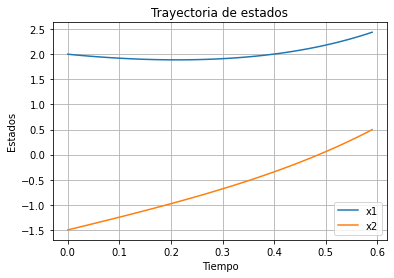

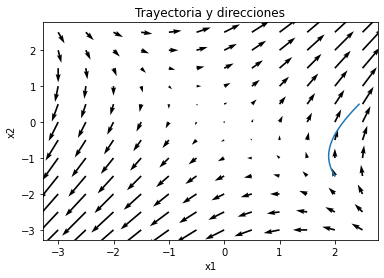

In [2]:
"""
Resolución de sistema de ecuaciones diferenciales
y diagrama de fase.

x1' = x1+2x2
x2' = 2x1+x2

@author: Ramiro Irastorza
"""
import numpy as n
import pylab as p
import scipy.integrate as integrate

def df1(x1, x2):
    return a11*x1 + a12*x2

def df2(x1, x2):
    return a21*x1 + a22*x2

def derivs(state, t):
    x1, x2 = state  
    deltaf1 = df1(x1, x2)  
    deltaf2 = df2(x1, x2) 
    return deltaf1, deltaf2

a11, a12 = 1.0, 2.0
a21, a22 = 2.0, 1.0

# the initial population
x10 = 2.0
x20 = -1.5

t = n.arange(0.0, 0.6, 0.01)

y0 = [x10, x20]  # the initial [rabbits, foxes] state vector
y = integrate.odeint(derivs, y0, t)
x1 = y[:,0]  # extract the x1
x2 = y[:,1]  # extract the x2

p.figure()
p.plot(t, x1, label='x1')
p.plot(t, x2, label='x2')
p.xlabel('Tiempo')
p.ylabel('Estados')
p.title('Trayectoria de estados')
p.grid()
p.legend()
#p.savefig('ejemplo2.7.png', dpi=150)
#p.savefig('ejemplo2.7.eps')


p.figure()
p.plot(x1, x2)
p.xlabel('x1')
p.ylabel('x2')
p.title('Plano de fase')


# campos de direccione 
#x1max = 1.1 * x1.max()
#x2max = 1.1 * x2.max()
#X1, X2 = n.meshgrid(n.arange(-1, x1max), n.arange(-1, x2max))
X1, X2 = n.meshgrid(n.arange(-3.0, 3.0, .5), n.arange(-3.0, 3.0, .5))
dX1 = df1(X1, X2)
dX2 = df2(X1, X2)
p.quiver(X1, X2, dX1, dX2)


#X1, X2 = n.meshgrid(n.arange(-1, x1max, .1), n.arange(-1, x2max, .1))
X1, X2 = n.meshgrid(n.arange(-3.0, 3.0, .01), n.arange(-3.0, 3.0, .01))
dX1 = df1(X1, X2)
dX2 = df2(X1, X2)

#p.contour(X1, X2, dX1, levels=[0], linewidths=3, colors='black')
#p.contour(X1, X2, dX2, levels=[0], linewidths=3, colors='black')
p.ylabel('x2')
p.title('Trayectoria y direcciones')

p.savefig('pplane.png', dpi=150)
###p.savefig('pplane.eps')


p.show()